In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from db_functions import db_query

# Query

##### The inner query selects the top 10 districts (written as region in the query) with highest number of entries per region. The outer query is groupped by region, whereby region, average price per square meter and counts are selected. 

In [3]:
db_data = db_query("""
    SELECT region, ROUND(AVG(price/sqm), 1), COUNT(*) 
    FROM wg_berlin_v2 
    WHERE price BETWEEN 200 AND 2000
    AND sqm >= 10
        AND region IN (
        SELECT most_entries
        FROM (
            SELECT region AS most_entries
            FROM wg_berlin_v2
            GROUP BY region
            ORDER BY COUNT(*) DESC
            LIMIT 10
        ) AS subquery
    )
    GROUP BY region
    ORDER BY COUNT(*) DESC
""")
db_data = [x for x in db_data]

# Barplot

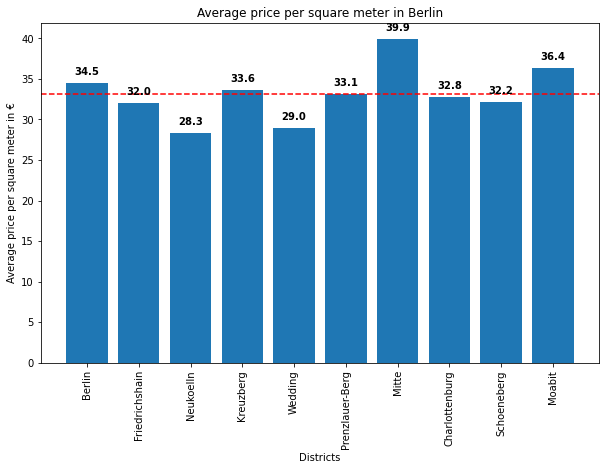

In [4]:
height = [value[1] for value in db_data]
bars = ([key[0] for key in db_data])
x_pos = np.arange(len(bars))

# Figure object
fig = plt.figure(figsize=(10, 8))

# Create bars
plt.bar(x_pos, height)

# Count annotations on each bar
for i, v in enumerate(height):
    plt.text(i, v+1, str(v), color='black', fontweight='bold', ha='center')

# x-axis names
plt.xticks(x_pos, bars, rotation=90)

# horizontal line for average
avg_value = np.mean(height)
plt.axhline(y=avg_value, color='r', linestyle='--')

# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)

plt.xlabel('Districts')
plt.ylabel('Average price per square meter in €')
plt.title('Average price per square meter in Berlin')
plt.show()

# Scatterplot

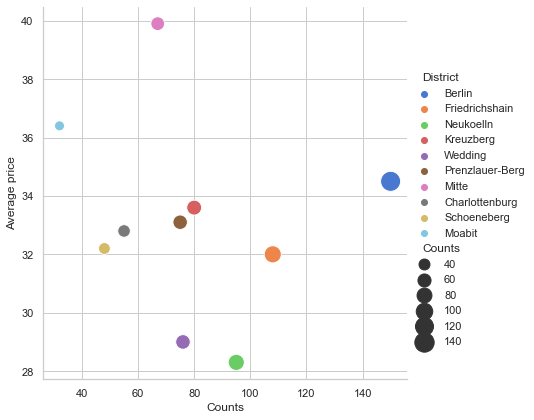

In [5]:
df = pd.DataFrame(db_data, columns=['District', 'Average price', 'Counts'])

sns.set_theme(style="whitegrid")
sns.relplot(x="Counts", y="Average price", hue="District", size="Counts",
            sizes=(100, 400), alpha=1, palette="muted", height=6, data=df)

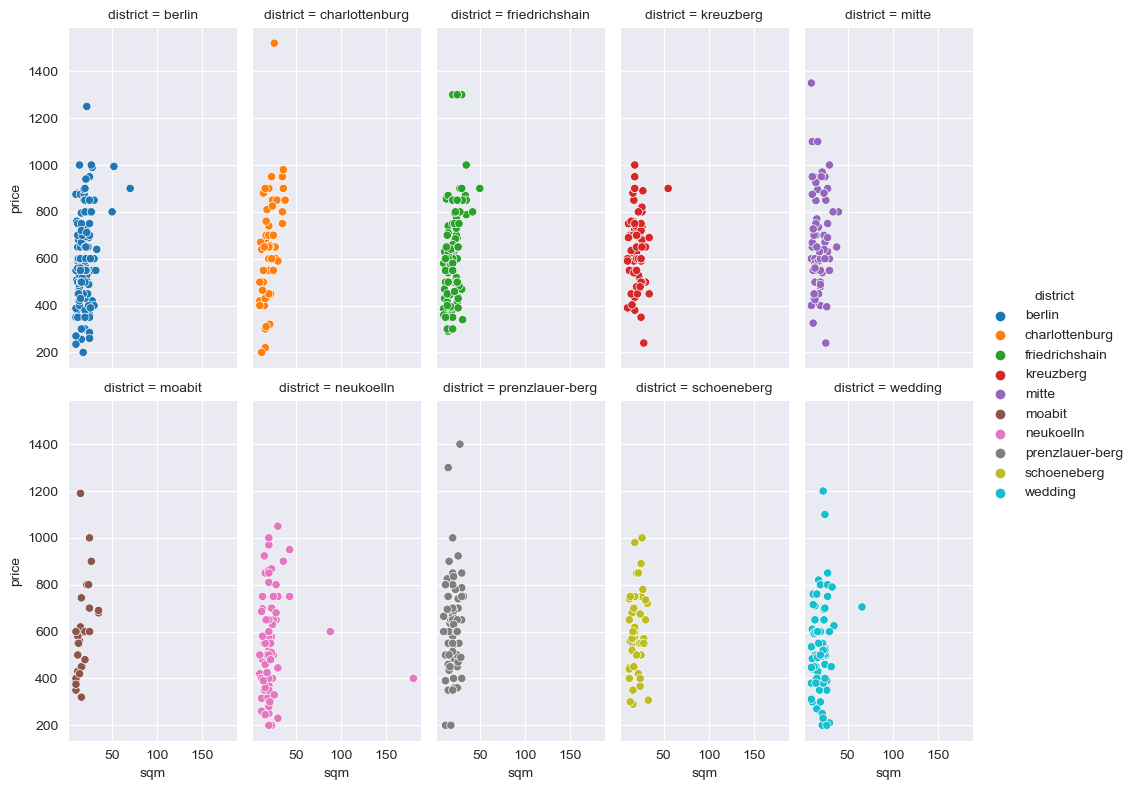

In [5]:
db_data = db_query("""
    SELECT region, price, sqm
    FROM wg_berlin_v2 
    WHERE price BETWEEN 200 AND 2000
    AND sqm >= 10
    AND region IN (
        SELECT most_entries
        FROM (
            SELECT region AS most_entries
            FROM wg_berlin_v2
            GROUP BY region
            ORDER BY COUNT(*) DESC
            LIMIT 10
        ) AS subquery
    )
    ORDER BY region;
""")


df = pd.DataFrame(db_data, columns=['district', 'price', 'sqm'])
df['district'] = df['district'].apply(str.lower)
df['price'] = pd.to_numeric(df['price'], downcast='integer')
df['sqm'] = pd.to_numeric(df['sqm'], downcast='integer')

sns.relplot(data=df, x="sqm", y="price", hue="district", col="district", col_wrap=5, height=4, aspect=.5)